In [ ]:
## DATA AUGMENTATION FOR OUR DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
pwd()

'/content'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EmotionDetection/data/emotion_dataset_2.csv')

In [ ]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
df.drop(['Unnamed: 0', 'Clean_Text'], axis=1,  inplace=True)

In [ ]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
df.shape

(34792, 2)

In [ ]:
#checking for any zero row data
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [ ]:
#checking for duplicated data
df.duplicated().sum()

3630

In [ ]:
#removing duplicated data
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(31162, 2)

In [ ]:
df['Emotion'].value_counts()

joy         10464
sadness      6175
fear         4266
surprise     4015
anger        3777
neutral      1466
disgust       855
shame         144
Name: Emotion, dtype: int64

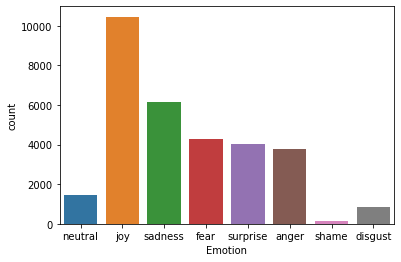

In [ ]:
# Plot
sns.countplot(x='Emotion',data=df)

There is lot of imbalance in dataset 

In [ ]:
# calculating length of each record in our df
df['length'] = df['Text'].apply(lambda x: len(x))
df.head()

,Emotion,Text,length
0,neutral,Why ?,7
1,joy,Sage Act upgrade on my to do list for tommorow.,47
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,100
3,joy,Such an eye ! The true hazel eye-and so brill...,478
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,121


DATA CLEANING

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [ ]:
df['Text'] = df['Text'].apply(lambda x: convert_to_lower(x))
df['Text'] = df['Text'].apply(lambda x: remove_numbers(x))
df['Text'] = df['Text'].apply(lambda x: remove_punctuation(x))
df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))
df['Text'] = df['Text'].apply(lambda x: remove_extra_white_spaces(x))
df['Text'] = df['Text'].apply(lambda x: lemmatizing(x))

In [ ]:
# calculating length of each record after performing text cleaning
df['length_after_cleaning'] = df['Text'].apply(lambda x: len(x))
df.head()

,Emotion,Text,length,length_after_cleaning
0,neutral,,7,0
1,joy,sage act upgrade list tommorow,47,30
2,sadness,way homegirl baby funeral man hate funeral rea...,100,62
3,joy,eye true hazel eyeand brilliant regular featur...,478,272
4,joy,iluvmiasantos ugh babe hugggzzz babe naamazed ...,121,97


In [ ]:
# converting string labels to int labels

label_map = {
    'joy': 0,
    'sadness': 1,
    'fear' : 2,
    'surprise' : 3,
    'anger' : 4,
    'neutral' : 5,
    'disgust' : 6,
    'shame' : 7
}

df['Emotion'] = df['Emotion'].map(label_map)
df.head()

,Emotion,Text,length,length_after_cleaning
0,5,,7,0
1,0,sage act upgrade list tommorow,47,30
2,1,way homegirl baby funeral man hate funeral rea...,100,62
3,0,eye true hazel eyeand brilliant regular featur...,478,272
4,0,iluvmiasantos ugh babe hugggzzz babe naamazed ...,121,97


## **DATA AUGMENTATION USING BERT**

In [ ]:
!pip install transformers
!pip install nlpaug

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 49.1 MB/s 
     |████████████████████████████████| 3.3 MB 36.3 MB/s 
     |████████████████████████████████| 895 kB 38.4 MB/s 
     |████████████████████████████████| 67 kB 4.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 410 kB 5.2 MB/s 
     |████████████████████████████████| 11.3 MB 42.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
import nlpaug.augmenter.word.context_word_embs as aug

In [ ]:
sample_text = df['Text'].iloc[95]

In [ ]:
sample_text

'world cant give happiness one last lot longer gofigure'

In [ ]:
augmenter = aug.ContextualWordEmbsAug(model_path='bert-base-uncased', action="insert")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

In [ ]:
augmented_sample_text = augmenter.augment(sample_text)

In [ ]:
augmented_sample_text

'this world cant give a happiness that one last lot longer it gofigure'

In [ ]:
for i in range(5):
    print(augmenter.augment(sample_text))

your world cant give her happiness... one last little lot longer gofigure
the world cant t give happiness only one last lot but longer gofigure
world cant u give happiness save one last save lot the longer gofigure
a world all cant give your happiness one last lot longer if gofigure
his world cant give him happiness one last lot of longer then gofigure


In [ ]:
df['Emotion'].value_counts()

0    10464
1     6175
2     4266
3     4015
4     3777
5     1466
6      855
7      144
Name: Emotion, dtype: int64

class 0 (Joy) has highest number of textual data points, therefore we will perform data augmentation for rest of the classes to have roughly same number of data points that class 0 has.

# Augmentation for class 1 ( Sadness )

In [ ]:
df[df['Emotion'] == 1]

,Emotion,Text,length,length_after_cleaning
2,1,way homegirl baby funeral man hate funeral rea...,100,62
6,1,couldnt wait see live missing nh wasnt painful...,119,83
11,1,people hide behind fake smile,39,29
15,1,shakuhachi dress mm lens pain,51,29
20,1,oh thats bad call doctor,48,24
...,...,...,...,...
34743,1,rip patrice oneilthe world funny miss,54,37
34748,1,sister lost one twin son first nephew older on...,96,63
34753,1,sebastian village pissing still dont mailbox key,70,48
34767,1,thought ill never sit school desk caused deep ...,109,69


In [ ]:
def augmentMyData(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Emotion'] == 1].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['Text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Emotion': 1,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
new_df = df.drop(labels=['length', 'length_after_cleaning'], axis=1)
new_df.head()

,Emotion,Text
0,5,
1,0,sage act upgrade list tommorow
2,1,way homegirl baby funeral man hate funeral rea...
3,0,eye true hazel eyeand brilliant regular featur...
4,0,iluvmiasantos ugh babe hugggzzz babe naamazed ...


In [ ]:
from sklearn.utils import shuffle

In [ ]:
aug_df = augmentMyData(new_df, augmenter, samples=4200)

  0%|          | 0/4200 [00:00<?, ?it/s]

In [ ]:
aug_df['Emotion'].value_counts()

0    10464
1    10375
2     4266
3     4015
4     3777
5     1466
6      855
7      144
Name: Emotion, dtype: int64

In [ ]:
aug_df.to_csv('aug_df.csv')

## Augmentation for class 2 ( Fear )

In [ ]:
def augmentMyData1(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Emotion'] == 2].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['Text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Emotion': 2,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
aug_df1 = augmentMyData1(aug_df, augmenter, samples=6000)

  0%|          | 0/6000 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
aug_df1['Emotion'].value_counts()

0    10464
1    10375
2    10266
3     4015
4     3777
5     1466
6      855
7      144
Name: Emotion, dtype: int64

In [ ]:
aug_df1.to_csv('aug_df1.csv')

# Augmentation for class 3 (Surprise)

In [ ]:
def augmentMyData2(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Emotion'] == 3].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['Text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Emotion': 3,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
aug_df2 = augmentMyData2(aug_df1, augmenter, samples=6200)

  0%|          | 0/6200 [00:00<?, ?it/s]

In [ ]:
aug_df2['Emotion'].value_counts()

0    10464
1    10375
2    10266
3    10215
4     3777
5     1466
6      855
7      144
Name: Emotion, dtype: int64

In [ ]:
aug_df2.to_csv('aug_df2.csv')

## Augmentation for class 4 ( Anger)

In [ ]:
def augmentMyData3(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Emotion'] == 4].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['Text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Emotion': 4,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
aug_df3 = augmentMyData3(aug_df2, augmenter, samples=6400)

  0%|          | 0/6400 [00:00<?, ?it/s]

In [ ]:
aug_df3['Emotion'].value_counts()

0    10464
1    10375
2    10266
3    10215
4    10177
5     1466
6      855
7      144
Name: Emotion, dtype: int64

In [ ]:
aug_df3.to_csv('aug_df3.csv')

## Augmentation for class 5 ( Neutral)

In [ ]:
def augmentMyData4(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Emotion'] == 5].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['Text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Emotion': 5,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
aug_df4 = augmentMyData4(aug_df3, augmenter, samples=8500)

  0%|          | 0/8500 [00:00<?, ?it/s]

In [ ]:
aug_df4['Emotion'].value_counts()

0    10464
1    10375
2    10266
3    10215
4    10177
5     9966
6      855
7      144
Name: Emotion, dtype: int64

In [ ]:
aug_df4.to_csv('aug_df4.csv')

## Augmentation for class 6 ( Disgust )

In [ ]:
def augmentMyData5(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Emotion'] == 6].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['Text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Emotion': 6,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
aug_df5 = augmentMyData5(aug_df4, augmenter, samples=9500)

  0%|          | 0/9500 [00:00<?, ?it/s]

In [ ]:
aug_df5['Emotion'].value_counts()

0    10464
1    10375
6    10355
2    10266
3    10215
4    10177
5     9966
7      144
Name: Emotion, dtype: int64

In [ ]:
aug_df5.to_csv('aug_df5.csv')

In [ ]:
aug_df5 = pd.read_csv('/content/drive/MyDrive/EmotionDetection/aug_df5.csv')

In [ ]:
aug_df5['Emotion'].value_counts()

0    10464
1    10375
6    10355
2    10266
3    10215
4    10177
5     9966
7      144
Name: Emotion, dtype: int64

In [ ]:
aug_df5.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
aug_df5['Emotion'].value_counts()

0    10464
1    10375
6    10355
2    10266
3    10215
4    10177
5     9966
7      144
Name: Emotion, dtype: int64

## Augmentation for class 7 ( Shame )

In [ ]:
def augmentMyData6(df, augmenter, repetitions=1, samples=200):
    augmented_texts = []
    # select only the minority class samples
    spam_df = df[df['Emotion'] == 7].reset_index(drop=True) # removes unecessary index column
    for i in tqdm(np.random.randint(0, len(spam_df), samples)):
        # generating 'n_samples' augmented texts
        for _ in range(repetitions):
            augmented_text = augmenter.augment(spam_df['Text'].iloc[i])
            augmented_texts.append(augmented_text)
    
    data = {
        'Emotion': 7,
        'Text': augmented_texts
    }
    aug_df = pd.DataFrame(data)
    df = shuffle(df.append(aug_df).reset_index(drop=True))
    return df

In [ ]:
aug_df6 = augmentMyData6(aug_df5, augmenter, samples=9500)

  0%|          | 0/9500 [00:00<?, ?it/s]

In [ ]:
aug_df6['Emotion'].value_counts()

0    10464
1    10375
6    10355
2    10266
3    10215
4    10177
5     9966
7     9644
Name: Emotion, dtype: int64

In [ ]:
# Final dataframe after text augmentation
aug_df6.to_csv('aug_df6.csv')